# Fourier Transform

**The Fourier Transform** can be used to decompose any signal into a sum of simple sine and cosine waves that can be charactorized by the frequency, amplitude and phase. **The Discrete Fourier Transform (DFT)** is used to analyze the frequency content of discrete, finite-duration signals. The DFT can be computed efficiently using **the Fast Fourier Transform (FFT)**, which reduces the computational complexity compared to the direct implementation of the DFT. Therefore here **np.fft.fft** method is used to obtain Fourier Spectrum.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's consider an example. Suppose there is a signal which is defined as,
$$
x(t)=2sin(2π×100t)+sin(2π×200t)
$$

In [2]:
sin_wave_1 = lambda t: 2*np.sin(2*np.pi*100*t)
sin_wave_2 = lambda t: 1*np.sin(2*np.pi*200*t)

sampling_frequency = 4000
sampling_interval = 1 / sampling_frequency
t = np.arange(0, 1 + sampling_interval, sampling_interval)
amplitude = sin_wave_1(t) + sin_wave_2(t)

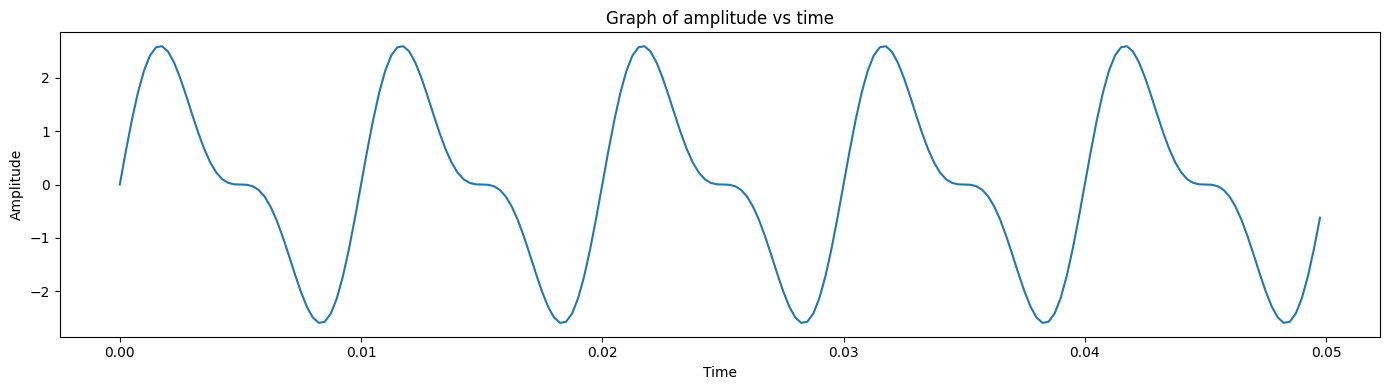

In [3]:
plt.figure(figsize=(14, 4))
upper_limit = int(0.1/sampling_interval + 1)
plt.plot(t[:200], amplitude[:200])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Graph of amplitude vs time")
plt.tight_layout()
plt.show()

Now let's obtain the Fourier Spectrum of $x(t)$.

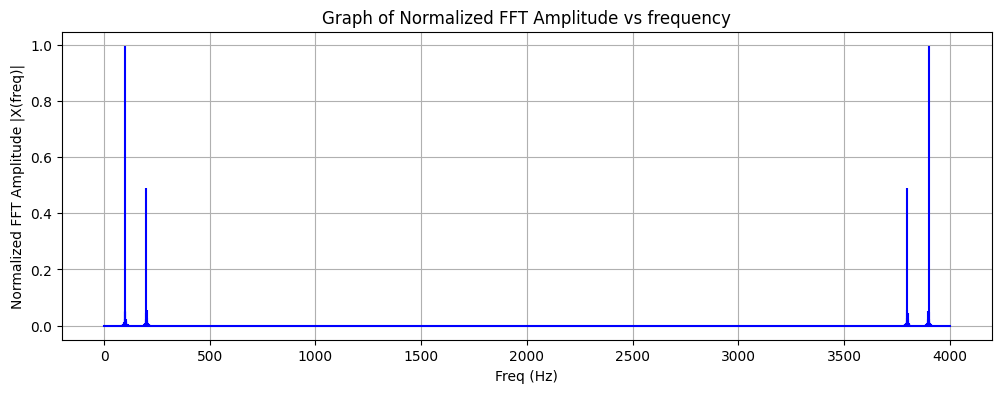

In [4]:
# apply FFT
X = np.fft.fft(amplitude)
N = len(X)
n = np.arange(N)
T = N/sampling_frequency
freq = n/T

plt.figure(figsize=(12, 4))
plt.stem(freq, np.abs(X)/N, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.title("Graph of Normalized FFT Amplitude vs frequency")
plt.grid()
plt.show()

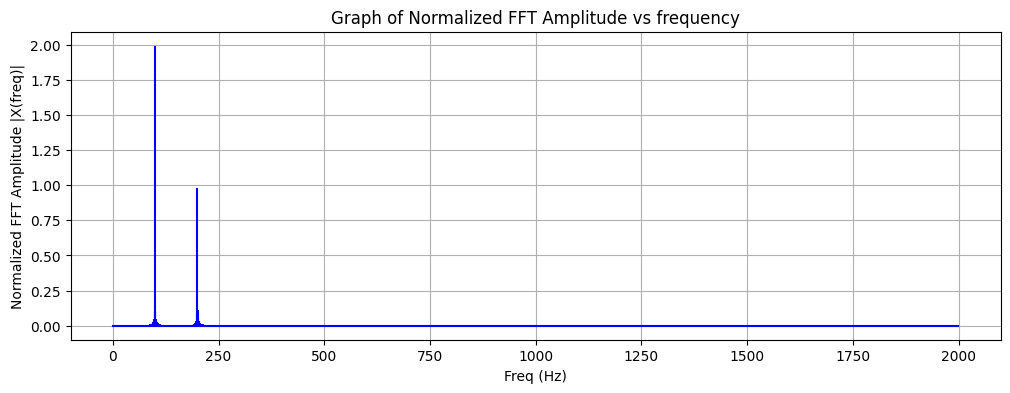

In [5]:
# Only get below Nyquist frequency
n_oneside = N//2
f_oneside = freq[:n_oneside]
X_oneside =X[:n_oneside]/n_oneside # normalizing

plt.figure(figsize=(12, 4))
plt.stem(f_oneside, np.abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.title("Graph of Normalized FFT Amplitude vs frequency")
plt.grid()
plt.show()

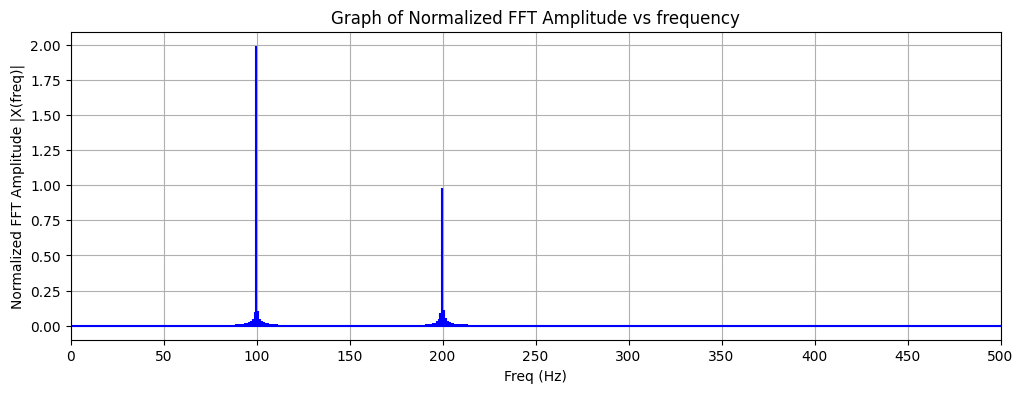

In [6]:
# To get more expanded view
plt.figure(figsize=(12, 4))
plt.stem(f_oneside, np.abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.title("Graph of Normalized FFT Amplitude vs frequency")
plt.xlim(0, 500)
plt.xticks(range(0, 501, 50))
plt.grid()
plt.show()

## Amplitude Modulation (AM)

Signals are modulated to transmit and receive the information from one location to another. Original signal or the information we need to transmit is known as modulating signal.
$$
S_m(t)=A_msin(2πF_mt)
$$
The high frequency signal which carry the signal is known as carrier signal.
$$
S_c(t)=A_csin(2πF_ct)
$$
In amplitude modulation, amplitude of the carrier wave is varying according to the modulating signal. Thus, the modulated signal becomes,
$$
S(t)=\left[ A_c + A_msin(2πF_mt) \right]sin(2πF_ct)
$$

Let's suppose $y_c(t) = 5sin(2\pi \times 500\times t)$ and $y_m(t) = 2sin(2\pi \times 50\times t)$. Therefore modulated signal is $y(t) = \left [ 5 + 2sin(2\pi \times 50t) \right ]sin(2\pi \times 500t)$.

In [7]:
y_c = lambda t: 5*np.sin(2*np.pi*500*t)
y_m = lambda t: 2*np.sin(2*np.pi*50*t)
y = lambda t: (5 + 2*np.sin(2*np.pi*50*t))*np.sin(2*np.pi*500*t)

sampling_frequency = 2000
sampling_interval = 1 / sampling_frequency
t = np.arange(0, 1 + sampling_interval, sampling_interval)

In [8]:
# define numeber of point need to display (Not necessary. Just for convenience).
upper_limit = int(0.1/sampling_interval + 1)

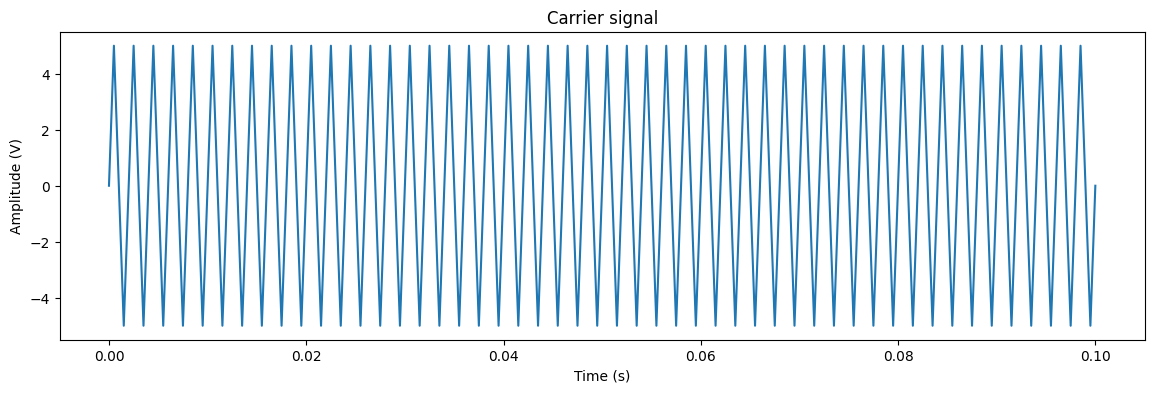

In [9]:
plt.figure(figsize=(14, 4))
plt.plot(t[:upper_limit], y_c(t)[:upper_limit])
plt.title("Carrier signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

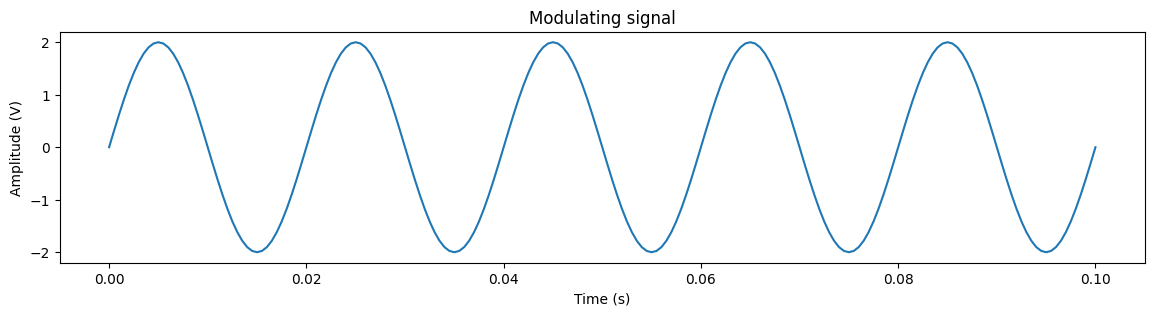

In [10]:
plt.figure(figsize=(14, 3))
plt.plot(t[:upper_limit], y_m(t)[:upper_limit])
plt.title("Modulating signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

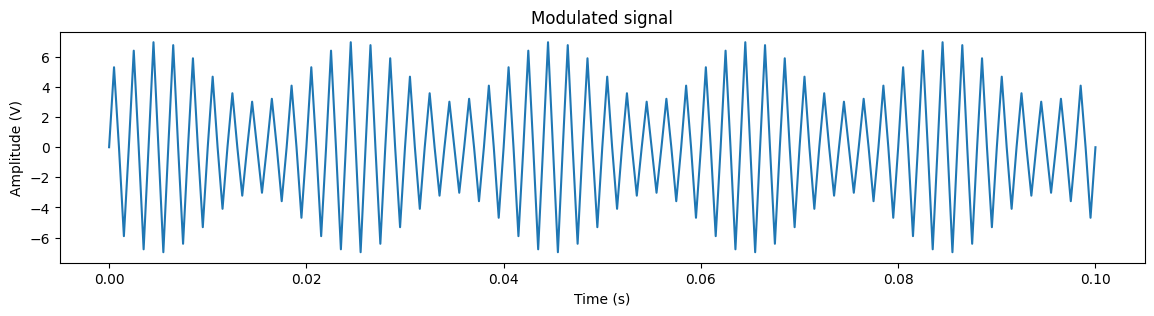

In [11]:
plt.figure(figsize=(14, 3))
plt.plot(t[:upper_limit], y(t)[:upper_limit])
plt.title("Modulated signal")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (V)')
plt.show()

Now Let's obatain the Fourier Spectrum

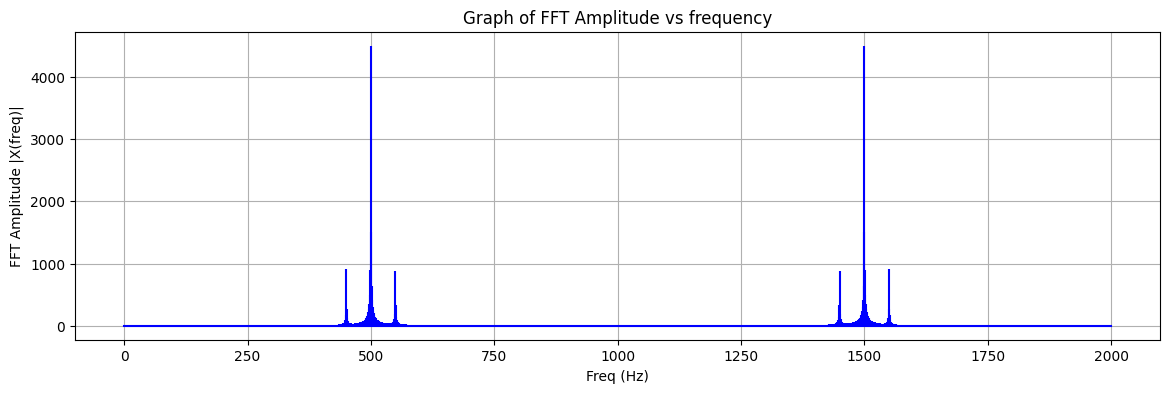

In [12]:
# apply FFT
X = np.fft.fft(y(t))
N = len(X)
n = np.arange(N)
T = N/sampling_frequency
freq = n/T

plt.figure(figsize=(14, 4))
plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("Graph of FFT Amplitude vs frequency")
plt.grid()
plt.show()

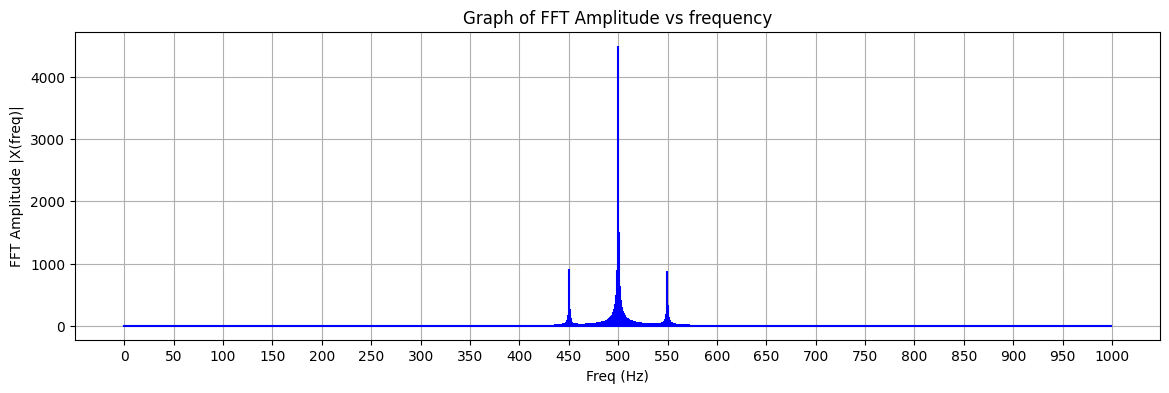

In [13]:
# only get below Nyquist frequency
n_oneside = N//2
f_oneside = freq[:n_oneside]
X_oneside =X[:n_oneside]

plt.figure(figsize=(14, 4))
plt.stem(f_oneside, np.abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title("Graph of FFT Amplitude vs frequency")
plt.xticks([i for i in range(0, n_oneside+1, 50)])
plt.grid()
plt.show()